# Analyzing Baby Names
*An Analysis of the Names given to Babys in the United States between 1880 - 2017*

In [2]:
import pandas as pd
from matplotlib import pyplot as plt

In [3]:
years = list(range(1880, 2018))
data = []

# Reading Data Files
*files from  www.ssa.gov/oact/babynames/limits.html (nation-wide data)*

In [4]:
for y in years:
    fn = f'yob{y}.txt'
    df = pd.read_csv(fn, header=None, index_col=0)
    df['year'] = y
    data.append(df)
df = pd.concat(data)

In [5]:
df.columns = ['Gender', 'Occurence', 'year']
df.head()

,Gender,Occurence,year
0,,,
Mary,F,7065,1880
Anna,F,2604,1880
Emma,F,2003,1880
Elizabeth,F,1939,1880
Minnie,F,1746,1880


# Comparing Genders
*over full timespan*

In [6]:
gendergroup = df.groupby('Gender')
gp = gendergroup['Occurence'].sum()

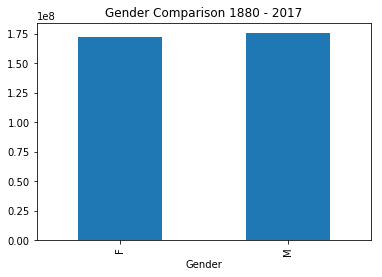

In [7]:
%matplotlib inline
gp.plot.bar(title="Gender Comparison 1880 - 2017")

# Frequent Babynames
*Which Babynames occur at least 150.000 times*

In [8]:
df.reset_index(inplace=True)

df.columns = ['names', 'Gender', 'Occurence', 'year']

In [9]:
fre = df.groupby('names')['Occurence'].sum()
ls = fre.to_frame()

frequent = ls[ls['Occurence'] > 1500000]
f = frequent.index

print("The", str(len(f)), "most popular names:")
for i in f:
    print(i)

The 16 most popular names:
Charles
Christopher
Daniel
David
Elizabeth
James
John
Joseph
Mary
Matthew
Michael
Patricia
Richard
Robert
Thomas
William


In [10]:
df.set_index(['names'], inplace=True)

# Visualizing popular or famous names

Text(0.5, 1.0, 'The name James given over time')

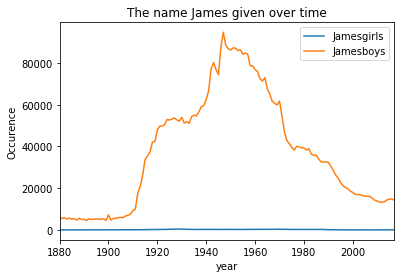

In [11]:

def plot_name(name):
    ls = df.loc[name]
    female = ls[ls['Gender'] == 'F']
    male = ls[ls['Gender'] == 'M']
    girls = female.groupby(['year'])['Occurence'].sum()
    boys = male.groupby(['year'])['Occurence'].sum()
    
    if len(female) != len([]) and len(male) != len([]):
        girls.plot(x='year', y='Occurence', label=name + 'girls')
        boys.plot(x='year', y='Occurence', label=name + 'boys')
        plt.legend()
        plt.ylabel("Occurence")
        plt.xlabel("year")
    elif len(female) != len([]) and len(male) == len([]):
        girls.plot(x='year', y='Occurence', label=name + 'girls')
        plt.legend()
        plt.ylabel("Occurence")
        plt.xlabel("year")
    elif len(male) != len([]) and len(female) == len([]):
        boys.plot(x='year', y='Occurence', label=name + 'boys')
        plt.legend()
        plt.ylabel("Occurence")
        plt.xlabel("year")
        

plot_name('James')
plt.title("The name James given over time")

Text(0.5, 1.0, 'The most popular names of the time frame')

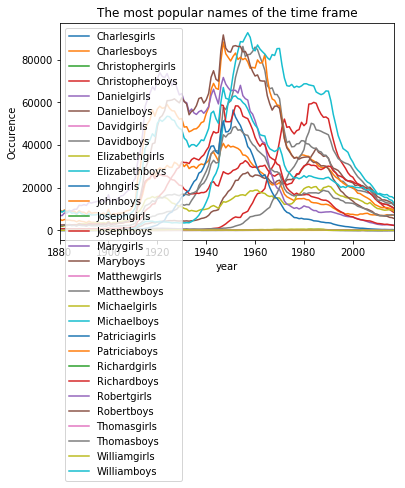

In [12]:
plot_name('Charles')
plot_name('Christopher')
plot_name('Daniel')
plot_name('David')
plot_name('Elizabeth')
plot_name('John')
plot_name('Joseph')
plot_name('Mary')
plot_name('Matthew')
plot_name('Michael')
plot_name('Patricia')
plot_name('Richard')
plot_name('Robert')
plot_name('Thomas')
plot_name('William')
plt.title("The most popular names of the time frame")

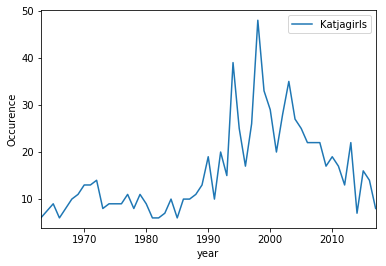

In [13]:
plot_name('Katja')

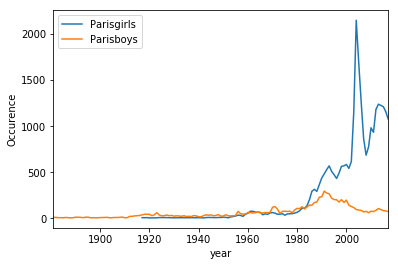

In [14]:
plot_name('Paris')

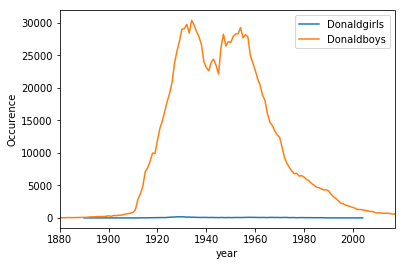

In [15]:
plot_name('Donald')

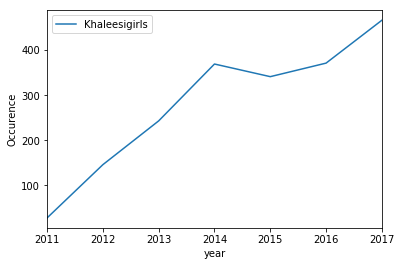

In [16]:
plot_name('Khaleesi')

# Total Birthrate in the U.S. over time

In [17]:
yearg = df.groupby('year')
yeargroup = yearg['Occurence'].sum()
yeargroup1 = yeargroup.to_frame()

Text(-1.0, 0.5, 'Occurence')

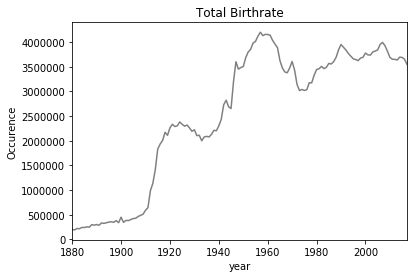

In [18]:
%matplotlib inline
yeargroup.plot(x='year', y='Occurence', color='grey', title="Total Birthrate")
plt.savefig('x.png', dpi=300)
plt.ylabel("Occurence")

**Graph Analysis Birthrate:**

* There was a significant increase in birth counts around the 1910's, a phenomenon that continued during the years of the Great Depression. 

* After the Great Depression ended the birthrate sunk by around 500.000 counts those years, before increasing continuously until the 1960's. A decade that is considered one of the most tumultuous and divisive decades in american history, marked by the JFK assassination, the civil rights movement, and the Vietnam War.

* This decline in fertility rate continued until the late 1970's, an era of technological advances. 

* From the 1990's until 2010 the birth rate held steady, fluctuating briefly around the turn of the millenium with a slow decline in recent years never quiet reaching its peak fertility count of the 1960's.

**Differentiated total birthrate over time by boys and girls**

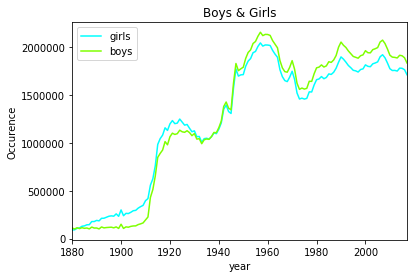

In [19]:
female = df[df['Gender'] == 'F']
male = df[df['Gender'] == 'M']

girls = female.groupby('year')['Occurence'].sum()
girls.plot(x='year', y='Occurence', color='#00FFFF', label='girls')
plt.ylabel("Occurence")

boys = male.groupby('year')['Occurence'].sum()
boys.plot(x='year', y='Occurence', color='#7FFF00', title="Boys & Girls", label='boys')
plt.ylabel("Occurence")
plt.legend()

# Normalizing
*Calculating the relative frequency of names in any given year*

In [20]:
df.reset_index(inplace=True)

In [21]:
df2 = df.merge(yeargroup1, 'left', 'year')
df2.columns = ('names','Gender', 'occurence', 'year', 'birthrate')
df['relative_frequency'] = df2['occurence'] / df2['birthrate']
df.head()

,names,Gender,Occurence,year,relative_frequency
0,Mary,F,7065,1880,0.035065
1,Anna,F,2604,1880,0.012924
2,Emma,F,2003,1880,0.009941
3,Elizabeth,F,1939,1880,0.009624
4,Minnie,F,1746,1880,0.008666


**Plotting names relative to overall births**

In [22]:
df.set_index('names', inplace=True)

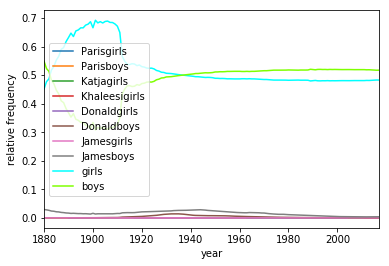

In [25]:
def plot_relative(name):
    ls = df.loc[name]
    female = ls[ls['Gender'] == 'F']
    male = ls[ls['Gender'] == 'M']
    girls = female.groupby(['year'])['relative_frequency'].sum()
    boys = male.groupby(['year'])['relative_frequency'].sum()
    
    if len(female) != len([]) and len(male) != len([]):
        girls.plot(x='year', y='relative_frequency', label=name + 'girls')
        boys.plot(x='year', y='relative_frequency', label=name + 'boys')
        plt.legend()
        plt.ylabel("relative frequency")
    elif len(female) != len([]) and len(male) == len([]):
        girls.plot(x='year', y='relative_frequency', label=name + 'girls')
        plt.legend()
        plt.ylabel("relative frequency")
    elif len(male) != len([]) and len(female) == len([]):
        boys.plot(x='year', y='relative_frequency', label=name + 'boys')
        plt.legend()
        plt.ylabel("relative frequency")

    
plot_relative('Paris')
plot_relative('Katja')
plot_relative('Khaleesi')
plot_relative('Donald')
plot_relative('James')

female = df[df['Gender'] == 'F']
male = df[df['Gender'] == 'M']
girls = female.groupby(['year'])['relative_frequency'].sum()
boys = male.groupby(['year'])['relative_frequency'].sum()

girls.plot(x='year', y='relative_frequency', color='#00FFFF', label='girls')
boys.plot(x='year', y='relative_frequency', color='#7FFF00', label='boys')
plt.legend()

In [26]:
df.reset_index(inplace=True)


# Name diversity

*Have Babynames become more diverse over time?*

**Definition of Diversity** *(Assumptions this calculation is based on):*

* The fact or quality of being diverse; difference.
* A point or respect in which things differ.
* Variety or multiformity.


Text(0, 0.5, 'Count')

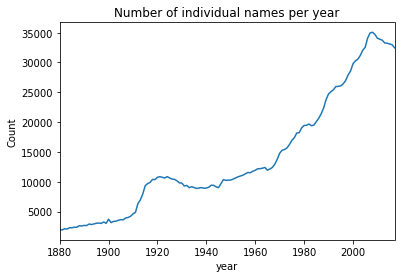

In [27]:
div = df.groupby('year')['names'].count()
div.plot(x='year', y='names', title=("Number of individual names per year"))
plt.ylabel("Count")

**Conclusion:**

*The diversity of names has grown constantly over the centuries with a notable rise in the 1920's and a slight deduction since 2010*

# Name length
*Finding the 10 longest names given since 1880*

In [28]:
df.columns = ['names', 'gender', 'occurence', 'year', 'relative_frequency']

def counter(x):
    return (len(x))

df['namelength'] = df['names'].apply(lambda x: counter(x))

In [29]:
longest = df.sort_values(by='namelength', ascending=False)
ln = longest['names'].unique()
long = ln[:10]
for i in long:
    print(i)

Christopherjame
Christianmichae
Mariadelosangel
Christianjoseph
Christopherjohn
Ryanchristopher
Christopherdavi
Christophermich
Franciscojavier
Christiananthon


# First letter statistics

In [30]:
def get_first(x):
    return x[0]

df['first_letter'] = df['names'].apply(lambda x: get_first(x))
df.head()

,names,gender,occurence,year,relative_frequency,namelength,first_letter
0,Mary,F,7065,1880,0.035065,4,M
1,Anna,F,2604,1880,0.012924,4,A
2,Emma,F,2003,1880,0.009941,4,E
3,Elizabeth,F,1939,1880,0.009624,9,E
4,Minnie,F,1746,1880,0.008666,6,M


**Names starting with an A**

In [31]:
dfA = df[df['first_letter'] == 'A']
A = dfA['names'].unique()
print(str(len(A)), "individual names start with an 'A' (see .unique)")

10292 individual names start with an 'A' (see .unique)


**Relative occurence of initials over time**

Text(0.5, 1.0, 'Relative occurence of first letter over time')

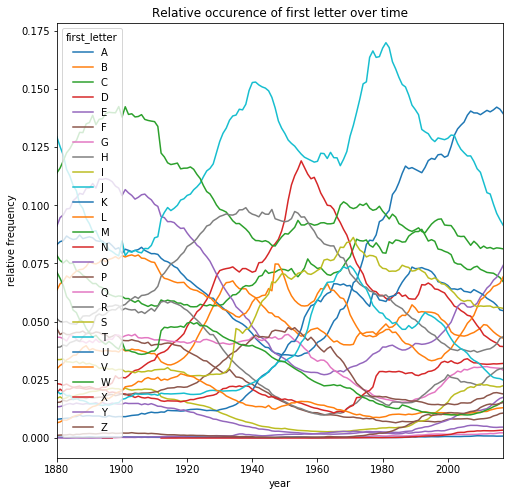

In [32]:
df.groupby(['first_letter', 'year'])['relative_frequency'].sum().unstack(0).plot.line(figsize=(8,8))
plt.ylabel("relative frequency")
plt.title("Relative occurence of first letter over time")

# Last letter statistics

In [33]:
def get_last(x):
    return x[-1]

df['last_letter'] = df['names'].apply(lambda x: get_last(x))

Text(0.5, 1.0, 'relative occurrence of last letters over time')

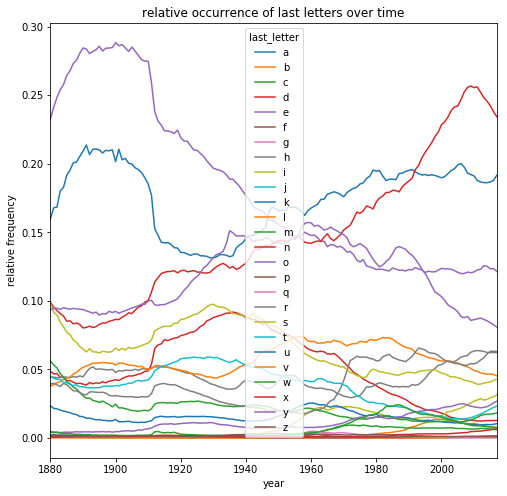

In [34]:
df.groupby(['last_letter', 'year'])['relative_frequency'].sum().unstack(0).plot.line(figsize=(8,8))
plt.ylabel("relative frequency")
plt.title("relative occurrence of last letters over time")

# Visualization of letter frequency

Text(0, 0.5, 'Occurence')

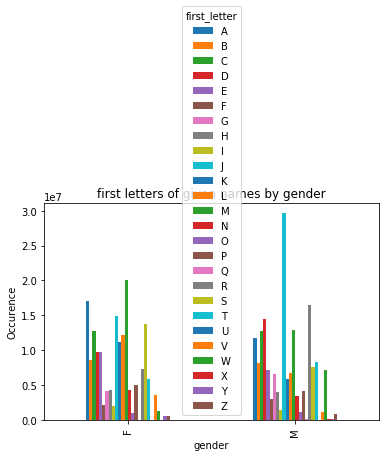

In [35]:
df8 = df.groupby(['gender', 'first_letter'])['occurence'].sum().unstack()
df8.plot.bar(title="first letters of given names by gender")
plt.ylabel("Occurence")

**Summary:**

*The three most popular first letters for female names are 'M', 'A' and 'J' in that order.*

*The three most popular first letter for male names are 'T' (overwhelmingly), 'R' and 'D' in that order.*

Text(0, 0.5, 'Occurence')

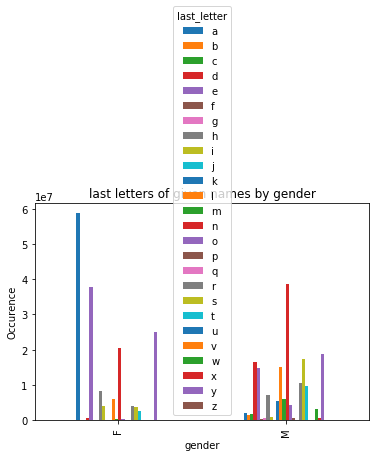

In [36]:
df9 = df.groupby(['gender', 'last_letter'])['occurence'].sum().unstack()
df9.plot.bar(title="last letters of given names by gender")
plt.ylabel("Occurence")

**Summary:**

*Female names often end with the letters 'a', 'e' or 'y' in that order*

*Male names often end with the letters 'n', 'y' and 'd' in that order*

# e-rich Names

In [37]:
df = df.reset_index()

In [38]:
df['dfe'] = df['names'].str.count('e')

In [39]:
e4 = df[df['dfe'] > 3]
e4 = e4['names'].unique()
for i in e4:
    print(i)
len(e4)

Genevieve
Tennessee
Zebedee
Geneveive
Geneieve
Geneviene
Jenevieve
Beverlee
Geneiveve
Geneveve
Bernedette
Genievieve
Gennevieve
Genevee
Geneivieve
Mercedese
Jerelene
Gwenevere
Clementene
Jewelene
Queenester
Vernesteen
Gerelene
Jewellene
Deseree
Jennielee
Merelene
Jeweldene
Deedee
Bevereley
Clementeen
Leverette
Sherelene
Dellareese
Marietherese
Shereese
Deneene
Deeneen
Jeneene
Chereese
Guenevere
Shereece
Heatherlee
Keelee
Genesee
Keekee
Jeremee
Destenee
Sheereen
Jenniferlee
Jenelee
Jesselee
Desieree
Sheeneeka
Dezeree
Merecedes
Mercedees
Mercedee
Stephenee
Felipedejesus
Demetree
Heavenlee
Creedence
Kenedee
Kennedee
Cheyeene
Genessee
Mercedeez
Jewelee
Demeree
Neelee
Serenitee
Leelee
Greenlee
Independence
Jewellee
Jezebelle
Nevaehlee
Gwenevieve
Renesmee
Gweneviere
Temperence
Breelee
Annabellelee
Renezmee
Peneloperose
Menachemmendel
Jennevieve
Mendeecee
Mendeecees
Chimeremeze
Kreedence


92

*Conclusion on e-rich names:*

<s>There are some brutal parents out there<s>